In [1]:
import numpy as np
import pandas as pd

import torch
import fastai
from fastai.vision.all import *
from ipywidgets import widgets

from pathlib import Path

In [2]:
torch.__version__, fastai.__version__

('2.5.1+cpu', '2.7.18')

In [3]:
torch.cuda.is_available()

False

In [4]:
path = Path('train')
path

Path('train')

In [5]:
d_block = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

In [6]:
dls = d_block.dataloaders(path)

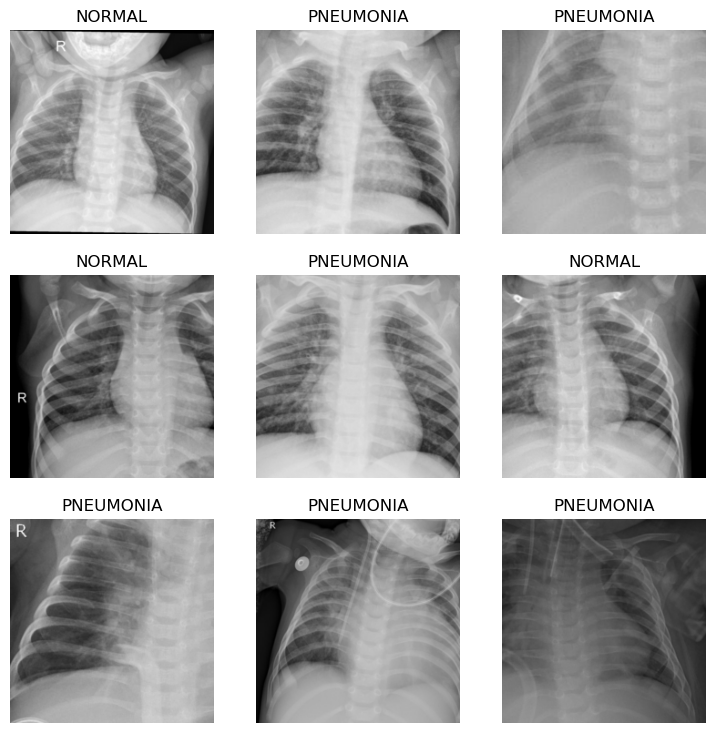

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

c:\Users\MAGISTR\anaconda3\Lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [9]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.451052,0.274700,0.928092,09:44


epoch,train_loss,valid_loss,accuracy,time
0,0.136043,0.098477,0.969319,10:07
1,0.083035,0.055707,0.981783,10:16
2,0.038391,0.051823,0.979866,09:54


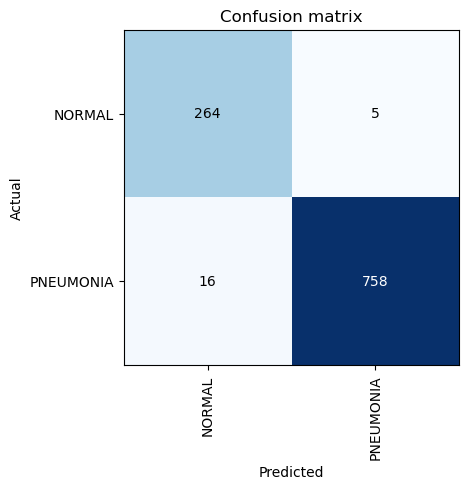

In [10]:
accur = ClassificationInterpretation.from_learner(learn)
accur.plot_confusion_matrix()

In [11]:
accur.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.94      0.98      0.96       269
   PNEUMONIA       0.99      0.98      0.99       774

    accuracy                           0.98      1043
   macro avg       0.97      0.98      0.97      1043
weighted avg       0.98      0.98      0.98      1043



In [15]:
test = ('test')

In [16]:
submission = pd.read_csv('sample_solution.csv')

In [17]:
submission.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [18]:
length = len(submission)
for i in range(length):
    label = submission.loc[i, 'id']
    img = PILImage.create(Path(f"test/{label}"))
    pred, pred_id, probs = learn.predict(img)
    submission.loc[i, 'labels'] = np.array(probs[1])

C:\Users\MAGISTR\AppData\Local\Temp\ipykernel_7496\706284882.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9999397993087769' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  submission.loc[i, 'labels'] = np.array(probs[1])


In [19]:
submission.head()

,id,labels
0,test_img_10001.jpeg,0.999940
1,test_img_10002.jpeg,0.028524
2,test_img_10003.jpeg,0.982617
3,test_img_10004.jpeg,0.999410
4,test_img_10005.jpeg,0.000004


In [20]:
submission.to_csv('solution.csv', index=False)